# 過去ログからより良いエントリポイントを探求

### システムパスに一つ上のディレクトリ .. を追加

In [16]:
import sys
sys.path.append('..')

## ライブラリのインポート

In [17]:
import datetime
import re

from matplotlib import (
    dates as mdates,
    font_manager as fm,
    pyplot as plt,
    ticker as ticker,
)
import numpy as np
import pandas as pd

from funcs.plots import getMajorXTicks
from funcs.preprocs_no_qt import (
    get_date_formatted,
    get_ohlc4analysis,
    get_tick4analysis,
)

In [34]:
#code = '7203'
code = '8306'
dateStr = '20250306'
ohlc_csv = '../ohlc1m/ohlc1m_%s_%s.csv' % (code, dateStr)
tick_csv = '../tick/tick_%s_%s.csv' % (code, dateStr)

## 過去ログ (OHLC) の読み込み

In [35]:
df = pd.read_csv(ohlc_csv)
df

,銘柄名称,市場名称,足種,日付,時刻,始値,高値,安値,終値,出来高,...,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
0,三菱ＵＦＪフィナンシャルＧ,東証,1M,2025/03/05,15:30,1927.5,1927.5,1927.5,1927.5,6089900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2025/03/06,09:00,1935.0,1942.5,1935.0,1941.5,3095900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2025/03/06,09:01,1941.5,1944.0,1941.5,1942.5,489600,...,1938.5,1942.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2025/03/06,09:02,1942.0,1943.0,1937.5,1937.5,623300,...,1937.5,1940.00,-1.0,1937.5,0.02,1937.5,0.0,0.0,NaN,4.0
4,NaN,NaN,NaN,2025/03/06,09:03,1937.5,1942.0,1937.5,1938.5,703800,...,1937.5,1938.88,1.0,1942.0,0.02,1937.5,0.0,0.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,2025/03/06,15:27,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,2025/03/06,15:28,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,2025/03/06,15:29,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,2025/03/06,15:30,1954.5,1954.5,1954.5,1954.5,8153400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## OHLC データを Matplotlib で扱いやすいように整形

In [36]:
df = get_ohlc4analysis(df)
df

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-06 09:00:00,1935.0,1942.5,1935.0,1941.5,3095900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 09:01:00,1941.5,1944.0,1941.5,1942.5,489600.0,1938.50,1944.0,1938.5,1942.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 09:02:00,1942.0,1943.0,1937.5,1937.5,623300.0,1940.44,1943.0,1937.5,1940.00,-1.0,1937.5,0.02,1937.50,0.0,0.0,NaN,4.00
2025-03-06 09:03:00,1937.5,1942.0,1937.5,1938.5,703800.0,1940.22,1942.0,1937.5,1938.88,1.0,1942.0,0.02,1937.50,0.0,0.0,NaN,3.00
2025-03-06 09:04:00,1938.5,1940.5,1938.5,1938.5,331700.0,1939.55,1940.5,1938.5,1939.00,1.0,1942.0,0.02,1937.59,1.0,0.0,0.0,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-06 15:26:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:27:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:28:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-06 15:29:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 過去ログ (Tick) の読み込み

In [37]:
df_tick = pd.read_csv(tick_csv)
df_tick

,Time,Price
0,09:00:00,1935.5
1,09:00:01,1935.5
2,09:00:03,1939.5
3,09:00:05,1939.0
4,09:00:07,1937.5
...,...,...
6608,15:24:53,1955.0
6609,15:24:55,1955.0
6610,15:24:57,1955.0
6611,15:24:59,1955.0


## Tick データを Matplotlib で扱いやすいように整形

In [38]:
dateFmt = get_date_formatted(dateStr)
df_tick = get_tick4analysis(df_tick, dateFmt)
df_tick

,Price
Datetime,
2025-03-06 09:00:00,1935.5
2025-03-06 09:00:01,1935.5
2025-03-06 09:00:03,1939.5
2025-03-06 09:00:05,1939.0
2025-03-06 09:00:07,1937.5
...,...
2025-03-06 15:24:53,1955.0
2025-03-06 15:24:55,1955.0
2025-03-06 15:24:57,1955.0


## ポジション・オープン条件

In [39]:
def timing_position_open(df: pd.DataFrame) -> pd.DataFrame:
    price_delta_min = 0.5
    level_slope = 2
    level_iqr = 4
    #return df[(price_delta_min * level_slope < df['Slope']) & (price_delta_min * level_iqr < df['IQR'])]
    return df[(df['Period'] == 1) & (0 < df['Slope'])]

timing_position_open(df)

,Open,High,Low,Close,Volume,H_Open,H_High,H_Low,H_Close,TREND,EP,AF,PSAR,Period,Diff,Slope,IQR
2025-03-06 09:39:00,1956.0,1957.0,1954.5,1955.0,138000.0,1958.61,1958.61,1954.50,1955.63,-1.0,1954.50,0.04,1960.74,1.0,1.5,1.5,3.0
2025-03-06 10:07:00,1942.5,1944.0,1942.0,1944.0,74000.0,1940.05,1944.00,1940.05,1943.13,1.0,1944.00,0.04,1940.16,1.0,2.0,2.0,1.5
2025-03-06 10:27:00,1951.0,1951.5,1950.5,1951.0,46800.0,1950.09,1951.50,1950.09,1951.00,1.0,1951.50,0.04,1948.62,1.0,0.5,0.5,0.5
2025-03-06 10:31:00,1948.0,1948.0,1947.0,1947.5,49000.0,1950.02,1950.02,1947.00,1947.63,-1.0,1947.00,0.04,1951.80,1.0,0.5,0.5,2.5
2025-03-06 12:31:00,1952.5,1955.0,1952.5,1953.0,91600.0,1953.11,1955.00,1952.50,1953.25,1.0,1955.00,0.04,1952.12,1.0,0.5,0.5,1.5
2025-03-06 12:38:00,1953.5,1954.0,1952.0,1952.0,71400.0,1954.35,1954.35,1952.00,1952.88,-1.0,1952.00,0.04,1956.32,1.0,1.5,1.5,1.5
2025-03-06 13:20:00,1954.0,1954.0,1952.5,1952.5,82100.0,1953.93,1954.00,1952.50,1953.25,-1.0,1952.50,0.04,1954.90,1.0,1.5,1.5,0.5
2025-03-06 13:40:00,1951.0,1951.0,1950.0,1950.0,90700.0,1952.27,1952.27,1950.00,1950.50,-1.0,1950.00,0.04,1953.84,1.0,1.5,1.5,1.0
2025-03-06 13:47:00,1953.0,1954.5,1953.0,1954.5,135600.0,1952.27,1954.50,1952.27,1953.75,1.0,1954.50,0.04,1950.18,1.0,1.5,1.5,1.0
2025-03-06 14:19:00,1956.5,1957.0,1955.5,1955.5,175200.0,1956.99,1957.00,1955.50,1956.13,-1.0,1955.50,0.04,1957.90,1.0,1.5,1.5,1.0


## チャート

### フォント設定

In [40]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

### 多段プロット

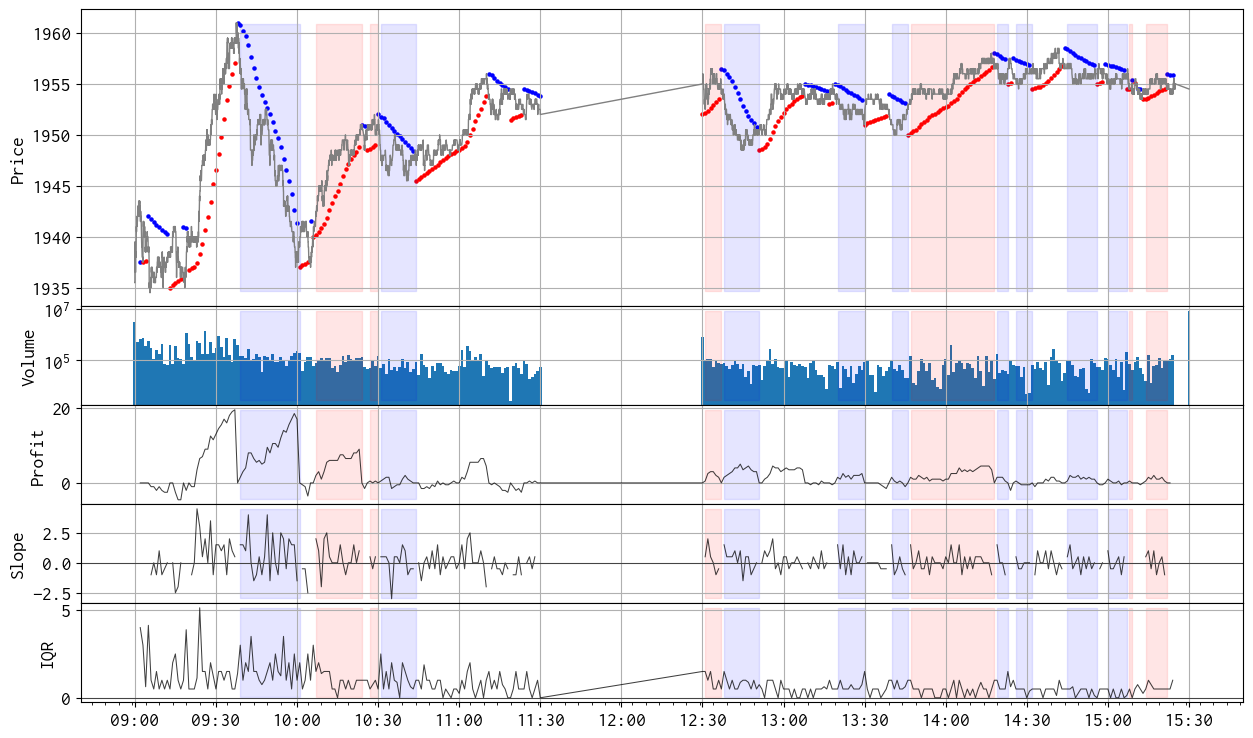

In [41]:
fig = plt.figure(figsize=(15, 9))

n = 5
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

# Tick
ax[0].plot(df_tick, linewidth=1, color='gray',)

# PSAR bear - Downward trend
df_bear = df[df['TREND'] < 0]
ax[0].scatter(x=df_bear.index, y=df_bear['PSAR'], color='blue', s=5,)

# PSAR bull - Upward trend
df_bull = df[df['TREND'] > 0]
ax[0].scatter(x=df_bull.index, y=df_bull['PSAR'], color='red', s=5,)

tick_position, tick_labels = getMajorXTicks(df)
ax[0].set_xticks(ticks=tick_position, labels=tick_labels,)
ax[0].xaxis.set_minor_locator(mdates.MinuteLocator(interval=5))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_ylabel('Price')

td = datetime.timedelta(minutes=1)
ax[1].bar(
    df.index,
    df['Volume'],
    width=td,
)
ax[1].set_yscale('log')
ax[1].set_ylabel('Volume')

# Diff
ax[2].plot(
    df['Diff'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[2].set_ylabel('Profit')

# Slope
ax[3].plot(
    df['Slope'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[3].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[3].set_ylabel('Slope')

# IQR
ax[4].plot(
    df['IQR'],
    linewidth=0.75,
    color='black',
    alpha=0.75,
)
ax[4].axhline(
    0,
    linewidth=0.75,
    color='#444',
)
ax[4].set_ylabel('IQR')

# 売買タイミング
df_position = timing_position_open(df)
position = False
trend = None
t0 = None

for t in df.index:
    if position:
        if trend != df.at[t, 'TREND']:
            if trend == 1:
                fcolor = 'red'
            elif trend == -1:
                fcolor = 'blue'
            else:
                fcolor = 'gray'

            for i in ax.keys():
                ax[i].fill_between(
                    [t0, t], 0.05, 0.95,
                    color=fcolor,
                    alpha=0.1,
                    transform=ax[i].get_xaxis_transform(),
                )
            position = False 
    else:
        if t in df_position.index:
            t0 = t
            trend = df.at[t, 'TREND']
            position = True

plt.show()

# シンプルな売買シミュレーション

---
#### 課題

トレンド反転後、period = 1 でエントリして、どれだけ収益を最大化できるか？

In [42]:
def do_position(trend):
    if trend > 0:
        msg = '買建'
    elif trend < 0:
        msg = '売建'
    else:
        msg = '不明'

    return msg

def do_replayment(trend):
    if trend > 0:
        msg = '売埋'
        profit = (price - price_position) * unit
    elif trend < 0:
        msg = '買埋'
        profit = (price_position - price) * unit
    else:
        msg = '不明'
        profit = 0
        
    return msg, profit

### ループ

In [44]:
# 時間定数
dt_start = pd.to_datetime('%s 09:00:00' % dateFmt)
dt_end = pd.to_datetime('%s 15:24:50' % dateFmt)
td = datetime.timedelta(seconds=1)

# トレンド
trend = np.float64('nan')

# 建玉
unit = 100
has_position = False
price_position = 0
total = 0

t = dt_start
while t <= dt_end:
    if t in df_tick.index:
        # 現在価格の更新
        price = df_tick.at[t, 'Price']

    # 1 秒後にトレンド確認
    t_target = t - td
    if t_target.second == 0:
        # トレンドが更新されるのは分単位（= 0 秒）
        if t_target in df.index:
            trend_new = df.at[t_target, 'TREND']
            period = df.at[t_target, 'Period']
            diff = df.at[t_target, 'Diff']
            slope = df.at[t_target, 'Slope']
            iqr = df.at[t_target, 'IQR']

            if np.isnan(trend_new):
                # nan だったら何もしない
                pass
    
            # トレンド反転か判定
            elif trend != trend_new:
                # 建玉を持って入れば返済
                if has_position:
                    msg, profit = do_replayment(trend)
                    print(t_target, msg, price, '{:+}'.format(int(profit)).rjust(5))
                    total += profit
                    has_position = False
    
                # トレンド情報更新
                trend = trend_new
    
            elif period == 1:
                # エントリ条件
                if 0 < slope:
                    msg = do_position(trend)
                    print(t_target, msg, price)
    
                    has_position = True
                    price_position = price
            else:
                pass
        else:
            pass
    else:
        pass
    # 時刻を１秒インクリメント
    t += td

# 返済
if has_position:
    msg, profit = do_replayment(trend)
    total += profit
    print(t, msg, price, '{:+}'.format(int(profit)).rjust(5))

print('---\n実現損益', '{:+}'.format(int(total)))

delta = df['High'].max() - df['Low'].min()
print('パフォーマンス {:+.1f}%'.format(total/delta))

2025-03-06 09:39:00 売建 1957.0
2025-03-06 10:01:00 買埋 1939.5 +1750
2025-03-06 10:07:00 買建 1942.0
2025-03-06 10:24:00 売埋 1951.0  +900
2025-03-06 10:27:00 買建 1950.5
2025-03-06 10:30:00 売埋 1950.5    +0
2025-03-06 10:31:00 売建 1948.0
2025-03-06 10:44:00 買埋 1948.0    +0
2025-03-06 12:31:00 買建 1952.5
2025-03-06 12:37:00 売埋 1954.0  +150
2025-03-06 12:38:00 売建 1953.5
2025-03-06 12:51:00 買埋 1950.0  +350
2025-03-06 13:20:00 売建 1954.0
2025-03-06 13:30:00 買埋 1951.5  +250
2025-03-06 13:40:00 売建 1951.5
2025-03-06 13:46:00 買埋 1953.0  -150
2025-03-06 13:47:00 買建 1953.0
2025-03-06 14:18:00 売埋 1956.5  +350
2025-03-06 14:19:00 売建 1957.0
2025-03-06 14:23:00 買埋 1956.5   +50
2025-03-06 14:26:00 売建 1955.5
2025-03-06 14:32:00 買埋 1956.0   -50
2025-03-06 14:45:00 売建 1957.0
2025-03-06 14:56:00 買埋 1956.0  +100
2025-03-06 15:00:00 売建 1955.0
2025-03-06 15:07:00 買埋 1955.5   -50
2025-03-06 15:08:00 買建 1954.5
2025-03-06 15:09:00 売埋 1954.0   -50
2025-03-06 15:14:00 買建 1954.5
2025-03-06 15:22:00 売埋 1954.5    +0
---
実現損益 +